<a href="https://colab.research.google.com/github/roggersanguzu/ipynbs/blob/main/Decision_Tree_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
iris_dataset=load_iris()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

print("Training set Accuracy",tree.score(X_train,y_train))
print("Testing Set Accuracy",tree.score(X_test,y_test))

DecisionTreeClassifier()

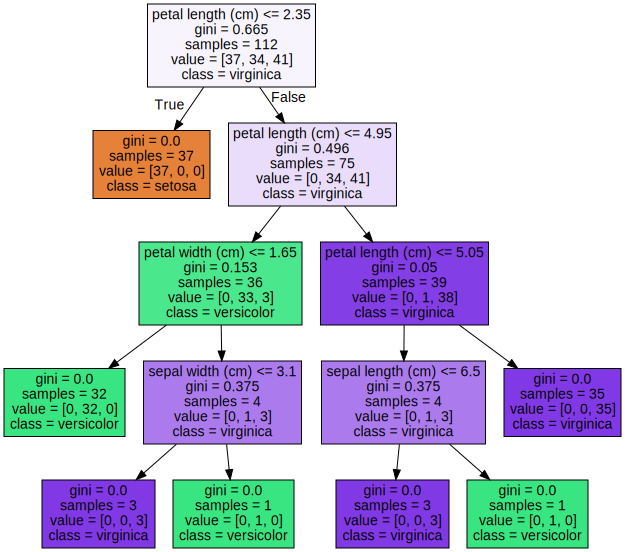

In [4]:
!pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot', class_names=['setosa','versicolor','virginica'],feature_names=iris_dataset.feature_names,filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [6]:
X=np.linspace(0,1)
X
y=1-(X*X)-(1-X)*(1-X)
y

array([0.        , 0.03998334, 0.07830071, 0.1149521 , 0.14993753,
       0.18325698, 0.21491045, 0.24489796, 0.27321949, 0.29987505,
       0.32486464, 0.34818825, 0.3698459 , 0.38983757, 0.40816327,
       0.42482299, 0.43981674, 0.45314452, 0.46480633, 0.47480217,
       0.48313203, 0.48979592, 0.49479384, 0.49812578, 0.49979175,
       0.49979175, 0.49812578, 0.49479384, 0.48979592, 0.48313203,
       0.47480217, 0.46480633, 0.45314452, 0.43981674, 0.42482299,
       0.40816327, 0.38983757, 0.3698459 , 0.34818825, 0.32486464,
       0.29987505, 0.27321949, 0.24489796, 0.21491045, 0.18325698,
       0.14993753, 0.1149521 , 0.07830071, 0.03998334, 0.        ])

In [15]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer['data'],cancer['target'],random_state=42, stratify=cancer.target)

from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)

print("Training set Accuracy",tree.score(X_train,y_train))
print("Testing Set Accuracy",tree.score(X_test,y_test))

Training set Accuracy 0.9882629107981221
Testing Set Accuracy 0.9370629370629371


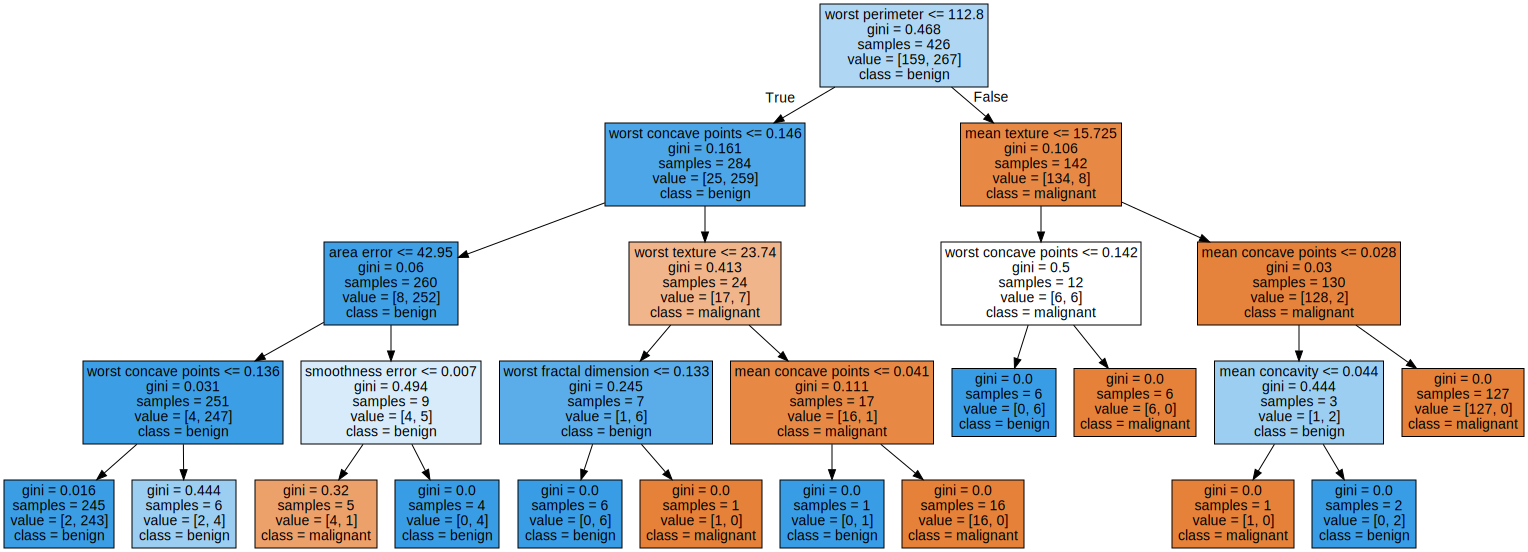

In [16]:
!pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot', class_names=cancer.target_names,feature_names=cancer.feature_names,filled=True)

import graphviz
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

In [17]:
print("Feature Importance",tree.feature_importances_)

Feature Importance [0.         0.02700566 0.         0.         0.         0.
 0.00697803 0.02348534 0.         0.         0.         0.
 0.         0.0166988  0.01488647 0.         0.         0.
 0.         0.         0.         0.03307602 0.72543275 0.
 0.         0.         0.         0.14346517 0.         0.00897176]


Text(0, 0.5, 'Feature')

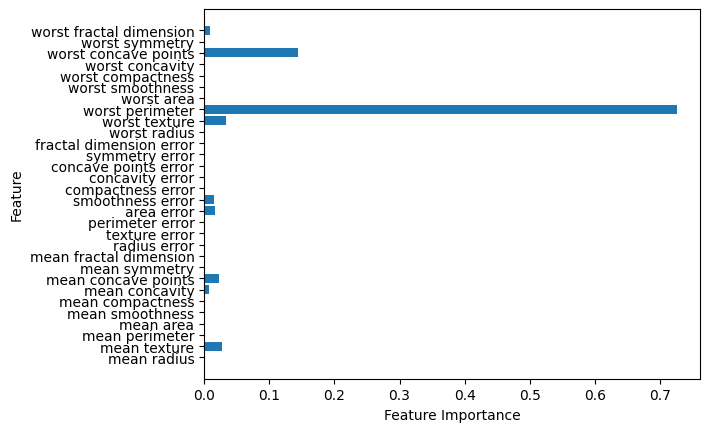

In [18]:
n_features=cancer.data.shape[1]
plt.barh(range(n_features),tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")